# PFR trajectory convex hull demonstration
## Import necessary python packages

In [1]:
from ipywidgets import interact, Checkbox

import scipy as sp
from scipy.spatial import ConvexHull
from scipy.integrate import odeint

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

## Define kinetics

We use the van de vusse system to demonstrate:
$$A \rightarrow B \rightarrow C$$
$$2A \rightarrow D$$

In [2]:
#3D van de Vusse kinetics
#A -> B -> C
#2A -> D

def rate_fn(C,t):
    cA = C[0]
    cB = C[1]
    
    #rate constants
    k1 = 1.0;
    k2 = 1.0;
    k3 = 10.0;

    #r = [rA, rB, rD]
    return sp.array([-k1*cA - 2*k3*cA**2,
                    k1*cA - k2*cB,
                    k3*cA**2])


## Plotting function

In [3]:
def plot_fn(t_PFR=0.001, plot_convhull=True):
    
    t_max = 5.0;
    
    #generate integration time and integrate PFR trajectory
    ts = sp.logspace(-4, sp.log10(t_PFR), 50)
    Cf = sp.array([1.0, 0.0, 0.0])
    Cs = odeint(rate_fn,Cf,ts)

    #plot
    plt.figure(figsize=(10,10))
    
    #plot concentration profiles over time
    ax1 = plt.subplot(2,2,(1,2))
    ax1.hold(True)
    
    h1, = ax1.plot(ts,Cs[:,0],'b-', label='Component A')
    h2, = ax1.plot(ts,Cs[:,1],'r-', label='Component B')
    h3, = ax1.plot(ts,Cs[:,2],'k-', label='Component D')
    
    plt.axis([0,t_max, 0,0.8])
    ax1.legend(handles=[h1, h2, h3])
    plt.xlabel('PFR residence time')
    plt.ylabel('Concentration (mol/L)')
    
    
    #plot in cA-cB concentration sapce 
    plt.subplot(2,2,3)
    plt.hold(True)

    plt.plot(Cs[:,0], Cs[:,1], 'r-')
    plt.plot(Cf[0], Cf[1], 'k^')
    
    #plot convex hull region if checkbox is True
    if plot_convhull:
        #calculate convex hull points
        hull = ConvexHull(Cs[:,(0,1)])
        chull_xs, chull_ys = Cs[hull.vertices,0], Cs[hull.vertices,1]
    
        plt.fill(chull_xs, chull_ys, 'g', alpha=0.3)
        plt.plot(chull_xs, chull_ys, 'wo')
    
    plt.axis([0,1.01, -0.01,0.1])
    plt.xlabel('cA (mol/L)')
    plt.ylabel('cB (mol/L)')
    
    
    #plot in cA-cD concentration sapce 
    plt.subplot(2,2,4)
    plt.hold(True)

    plt.plot(Cs[:,0], Cs[:,2], 'r-')
    plt.plot(Cf[0], Cf[2], 'k^')
    
    #plot convex hull region if checkbox is True
    if plot_convhull:
        #calculate convex hull points
        hull = ConvexHull(Cs[:,(0,2)])
        chull_xs, chull_ys = Cs[hull.vertices,0], Cs[hull.vertices,2]
    
        plt.fill(chull_xs, chull_ys, 'g', alpha=0.3)
        plt.plot(chull_xs, chull_ys, 'wo')
    
    plt.axis([-0.010,1, -0.01,0.5])
    plt.xlabel('cA (mol/L)')
    plt.ylabel('cD (mol/L)')
    
    plt.show()

## Interact
Drag the slider to show how the concentrations change in a PFR

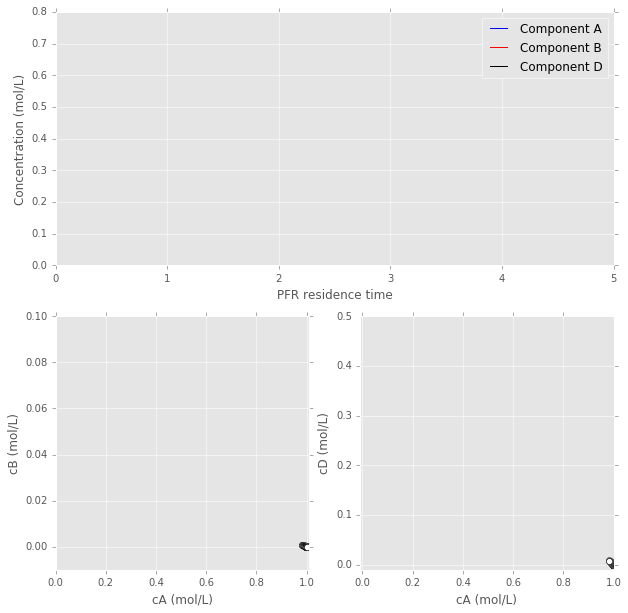

<function __main__.plot_fn>

In [4]:
interact(plot_fn, t_PFR=(0.001,5,0.001),
           plot_convhull=Checkbox(description="Plot convex hull", value=True))